<h1> The Challenge:</h1>

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade

I choose math for 8th grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# feel free to import other libraries! 

In [2]:
df = pd.read_csv('../data/states_edu.csv')

Chosen test: **Math, 8th grade**

<h2> Cleanup (optional)</h2>

_Use this space to rename columns, deal with missing data, etc._

In [3]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

df.dropna(subset=['AVG_MATH_8_SCORE'], inplace=True)

In [4]:
((df.ENROLL_ALL - df.ENROLL_ALL_EST)/df.ENROLL_ALL).describe()

count    397.000000
mean       0.025946
std        0.051301
min       -0.096404
25%        0.003988
50%        0.013523
75%        0.031392
max        0.450693
dtype: float64

Here, I'm just copying the code from the tutorial to fill in the estimates of enrollment

In [5]:
df.ENROLL_ALL_EST = df.ENROLL_ALL_EST.fillna(df.ENROLL_ALL)

In [6]:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,731634.0,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
2,1992_ARIZONA,ARIZONA,1992,673477.0,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,441490.0,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,5254844.0,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
5,1992_COLORADO,COLORADO,1992,612635.0,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,50648.0,45025.0,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN


<h2> Feature Selection </h2>

_Use this space to modify or create features_

Here I created a new variable that represents expenditure per student, but I used ENROLL_ALL_EST so that our data is more complete.

In [7]:
from sklearn import preprocessing

In [8]:
df['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'] = df['SUPPORT_SERVICES_EXPENDITURE'] / df['ENROLL_ALL_EST']
df['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'].describe()


count    439.000000
mean       3.340180
std        1.325775
min        0.853845
25%        2.517576
50%        3.124562
75%        3.950504
max        8.813005
Name: SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT, dtype: float64

This is how much is spend on instruction per student. I think that this will be a good predictor at the same level as support services per student

In [9]:
df['INSTRUCTIONAL_EXPENDITURE_PER_STUDENT'] = df['INSTRUCTION_EXPENDITURE'] / df['ENROLL_ALL_EST']
df['INSTRUCTIONAL_EXPENDITURE_PER_STUDENT'].describe()

count    439.000000
mean       5.734327
std        2.178195
min        1.814198
25%        4.303093
50%        5.358959
75%        6.691003
max       15.942903
Name: INSTRUCTIONAL_EXPENDITURE_PER_STUDENT, dtype: float64

In [10]:
df['PERCENT_REV_ON_EDUCATION'] = df['INSTRUCTION_EXPENDITURE'] / df['TOTAL_REVENUE'] 
df['PERCENT_REV_ON_EDUCATION'].describe()

count    439.000000
mean       0.519439
std        0.041053
min        0.361075
25%        0.494380
50%        0.518664
75%        0.542471
max        0.658496
Name: PERCENT_REV_ON_EDUCATION, dtype: float64

Final feature list: **Support Service expenditure per student, Instructional Expenditure per student, Percent of Revenue Spent on Education**

Feature selection justification: **<Support Service expenditure Per Student was chosen because it seems logical that the more is spent on support services, the healthier the children will be and they will be more likely to succeed in school. Instructional Expenditure per student was chosen, because it seems like spending more on students will also increase their performance. Finally, percent revenue spent on education was chosen because it should be an indicator of how much the state values education, and how much effort they are willing to put into it. The higher this number, the more likely education is strongly supported and children are likely to perform\>**

I'm also going to standardize this data down the line

<h2> EDA </h2>

Visualization 1

Looking at 8th grade math scores on their own. This is useful because it tells us about 

Text(0.5, 1.0, 'Distribution of 8th grade math scores')

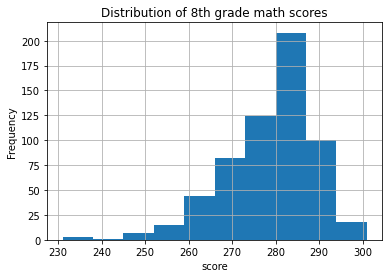

In [11]:
df.AVG_MATH_8_SCORE.hist()
plt.xlabel('score')
plt.ylabel('Frequency')
plt.title('Distribution of 8th grade math scores')

Text(0, 0.5, '8th grade math score')

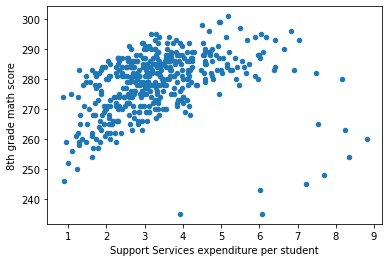

In [12]:
df.plot.scatter(x='SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT', y='AVG_MATH_8_SCORE')
plt.xlabel('Support Services expenditure per student')
plt.ylabel('8th grade math score')

**<Here I plotted one of my indepedent variables, Support Services expenditure per student, against my outcome variable. This is useful because we can see how the data is related to each other and whether or not there is even a semblance of correlation. Here, there does seem to be a positive correlation between support services expenditure and math scores, with a few outliers (we'll try to get rid of these later)>**

Visualization 2

Text(0, 0.5, '8th grade math score')

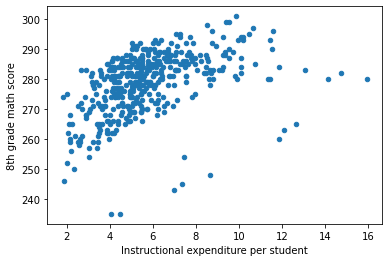

In [13]:
df.plot.scatter(x='INSTRUCTIONAL_EXPENDITURE_PER_STUDENT', y='AVG_MATH_8_SCORE')
plt.xlabel('Instructional expenditure per student')
plt.ylabel('8th grade math score')

**<Here I plotted another one of my indepedent variables, Support Services expenditure per student, against my outcome variable. There also does seem to be a positive correlation between support services expenditure and math scores, with a few more outliers (once again, we'll try to get rid of these later)>**

Text(0, 0.5, '8th grade math score')

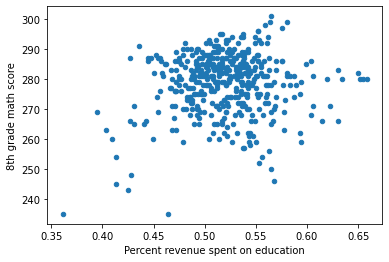

In [14]:
df.plot.scatter(x='PERCENT_REV_ON_EDUCATION', y='AVG_MATH_8_SCORE')
plt.xlabel('Percent revenue spent on education')
plt.ylabel('8th grade math score')

**This is my final independent variable, percent revenue spent on education plotted against average math scores. There doesn't seem to be much of a correlation here between scores and the variable, except at the lower end. If 45% or less is spent, then it seems like scores decrease rapidly.>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [100]:
from sklearn.model_selection import train_test_split

In [108]:
X = df[['PERCENT_REV_ON_EDUCATION','INSTRUCTIONAL_EXPENDITURE_PER_STUDENT', 'SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT' ]].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE'] #what does this do????
# I'm pretty sure this model is logorithmic, so i'm fitting my y values to that
# So that I can perform a linear regression later
#i.e instead of y = Ae^(-Bx), we take ln(Y) = ln(A) - BX, which is linear
ln_Y = np.log(y).dropna()
ln_Y

0       5.529429
2       5.579730
3       5.545177
4       5.564520
5       5.605802
          ...   
1219    5.662960
1220    5.659482
1221    5.602119
1222    5.666427
1223    5.659482
Name: AVG_MATH_8_SCORE, Length: 439, dtype: float64

In [109]:
X_train, X_test, y_train, y_test = train_test_split(
     X, ln_Y, test_size=0.3, random_state=0)

<h2> Prediction </h2>

Chosen ML task: **<REGRESSION/CLASSIFICATION>**

In [110]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [111]:
# create your model here
model = LinearRegression()

In [112]:
model.fit(X_train, y_train)

LinearRegression()

In [113]:
print(model.intercept_)
print(model.coef_)

5.670816897192666
[-0.1398878   0.01664957 -0.01902144]


In [114]:
# R**2 value describes how well a linear model fits the data
model.score(X_test, y_test)

0.30100263110782954

In [115]:
# mean error
np.mean(model.predict(X_test)-y_test)

0.0023681088773897636

In [116]:
# mean absolute error
np.mean(np.abs(model.predict(X_test)-y_test))

0.026500682196834754

In [117]:
# root mean squared error -- penalizes large errors
np.mean((model.predict(X_test)-y_test)**2)**0.5

0.03558046659758878

Text(0, 0.5, 'log of Math 8 scores')

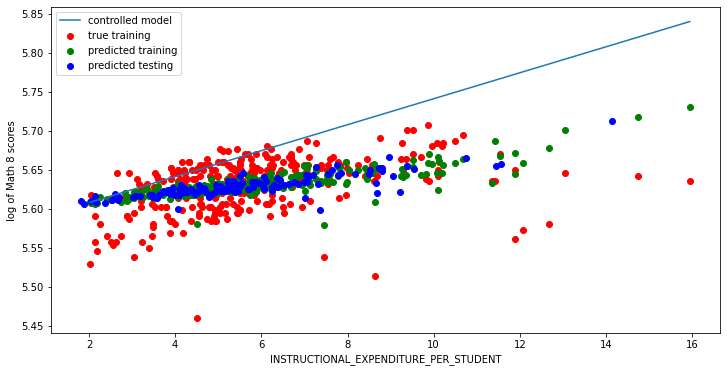

In [121]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = "INSTRUCTIONAL_EXPENDITURE_PER_STUDENT"
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('log of Math 8 scores')

<h2> Summary </h2>

**<The data fit relatively well, with an R^2 value of .3. This means there is definitely a trend, but there may be a better model to fit to the data. We can see from our graph that we seem to be over estimating scores for this case.\>**